<h1 align="center">Data Visualization with Python</h1>

## Instructors
- Scott Bailey 
- Vincent Tompkins

This workshop was originally written and taught at Stanford by Javier de la Rosa (Postdoctoral Research at UNED) and Scott Bailey.

## Goal
By the end of our workshop today, we hope you'll be able to load in data and visualize it in different ways depending on your specific needs and the nature of the data. We will work with a couple of customized datasets from the [Stanford Open Policing Project](https://openpolicing.stanford.edu/).

## Prerequisites



## Topics
- Visualization
- Univariate plotting
 - Bar charts
 - Histograms
 - Line charts
 - Time series
 - Box plots
 - Area charts
- Bivariate plotting
 - Scatter plots
 - Stacked plots
 - Box plots (again)
- Styling
- Seaborn
 - Faceting
- Interactive plots
 - Plotly

## Jupyter Notebooks and Google Colab

Jupyter notebooks are a way to write and run Python code in an interactive way. They're quickly becoming a standard way of putting together data, code, and written explanation or visualizations into a single document and sharing that. There are a lot of ways that you can run Jupyter notebooks, including just locally on your computer, but we've decided to use the Azure notebook platform, from Microsoft. This is a cloud platform that allows you to create libraries, which are effectively project folders and virtual environments that can contain static files and Python notebooks. They come with a number of popular libraries pre-installed, and allow you to install other libraries as needed.

Using the Azure notebook platform allows us to focus on learning and writing Python in the workshop rather than on setting up Python, which sometimes can take a bit of extra work depending on platforms and other installed applications. If you'd like to install a Python distribution locally, though, feel free to drop by our walk-in consulting or request a consultation.

## Environment
For those using Anaconda or their own local installation of Jupyter Notebooks, in this workshop we'll need an environment with the following packages:
- `pandas`
- `matplotlib`
- `seaborn`, available in the `conda-forge` channel
- `plotly`, available in the `conda-forge` channel
- `geopandas`, available in the `conda-forge` channel
- `bokeh`, available in the `conda-forge` channel


## Datasets and Pandas

From Jake Vanderplas' book [**Python Data Science Handbook**](http://shop.oreilly.com/product/0636920034919.do) (from which some code excerpts are used in this workshop):

> Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a `DataFrame`. `DataFrame`s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

In [1]:
import pandas as pd

# Set some options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

We will be using a couple of datasets from the Stanford Open Policing project.

In [2]:
stops_url = 'https://github.com/cengel/R-data-viz/raw/master/data/MS_stops.csv'
stops_by_county_url = 'https://github.com/cengel/R-data-viz/raw/master/data/MS_stops_by_county.csv'

Pandas has a very decent [documentation](http://pandas.pydata.org/pandas-docs/stable/), and using Jupyter, any method help can be shown by appending the a `?` to the end and running the cell.

One of the nice things about Pandas is that is able to load in data from the Internet without blinking an eye. The first dataset, which we will store in the `DataFrame` `stops`, contains one entry for each traffic stop in Mississippi between 2013 and 2016. Let's take a look at it.

In [3]:
stops = pd.read_csv(
    stops_url,
    index_col='id',
    parse_dates=['stop_date', 'driver_birthdate']).dropna()
stops[['county_fips', 'driver_age', 'y_day']].astype(int, inplace=True)
stops

,state,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,violation_raw,officer_id,driver_age,violation,wk_day,y_day
id,,,,,,,,,,,,,,
MS-2013-00001,MS,2013-01-01,Jones County,28067,Mississippi Highway Patrol,male,1950-06-14,Black,Seat belt not used properly as required,J042,63.0,Seat belt,Tue,1
MS-2013-00002,MS,2013-01-01,Lauderdale County,28075,Mississippi Highway Patrol,male,1967-04-06,Black,Careless driving,B026,46.0,Careless driving,Tue,1
MS-2013-00003,MS,2013-01-01,Pike County,28113,Mississippi Highway Patrol,male,1974-04-15,Black,Speeding - Regulated or posted speed limit and...,M009,39.0,Speeding,Tue,1
MS-2013-00004,MS,2013-01-01,Hancock County,28045,Mississippi Highway Patrol,male,1981-03-23,White,Speeding - Regulated or posted speed limit and...,K035,32.0,Speeding,Tue,1
MS-2013-00005,MS,2013-01-01,Holmes County,28051,Mississippi Highway Patrol,male,1992-08-03,White,Speeding - Regulated or posted speed limit and...,D028,20.0,Speeding,Tue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS-2016-24293,MS,2016-07-09,George County,28039,Mississippi Highway Patrol,male,1992-07-14,White,Speeding - Regulated or posted speed limit and...,K025,24.0,Speeding,Sat,191
MS-2016-24294,MS,2016-07-10,Copiah County,28029,Mississippi Highway Patrol,male,1975-12-23,Black,Speeding - Regulated or posted speed limit and...,C033,41.0,Speeding,Sun,192
MS-2016-24295,MS,2016-07-11,Grenada County,28043,Mississippi Highway Patrol,male,1998-02-02,White,Seat belt not used properly as required,D014,18.0,Seat belt,Mon,193


We will also be using the same dataset, but aggregated by county and enriched with some other county information. This dataset, which we will store in `stops_county`, contains two variables which represent for each county, and for both white and black, the ratio of drivers stopped out of the total population over 18: `pct_black_stopped` and `pct_white_stopped`.

In [4]:
stops_county = pd.read_csv(stops_by_county_url).dropna()
stops_county

,county_name,county_fips,driver_race_Black,driver_race_White,black_pop,white_pop,pct_black_stopped,pct_white_stopped,wb_delta,bias
0,Adams County,28001,583,359,17757,12856,0.032832,0.027925,-0.004907,black bias
1,Alcorn County,28003,468,2877,4281,31563,0.109320,0.091151,-0.018169,black bias
2,Amite County,28005,1589,1331,5416,7395,0.293390,0.179986,-0.113403,black bias
3,Attala County,28007,2096,2107,8194,10649,0.255797,0.197859,-0.057938,black bias
4,Benton County,28009,121,93,3078,5166,0.039311,0.018002,-0.021309,black bias
...,...,...,...,...,...,...,...,...,...,...
77,Webster County,28155,59,97,1964,7880,0.030041,0.012310,-0.017731,black bias
78,Wilkinson County,28157,34,9,6603,2698,0.005149,0.003336,-0.001813,black bias
79,Winston County,28159,2256,2066,8919,9602,0.252943,0.215164,-0.037780,black bias
80,Yalobusha County,28161,174,148,4909,7330,0.035445,0.020191,-0.015254,black bias


## Visualization

Visualization in Python is a bit... convoluted. And it changes almost every day. 

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png" width=960>
<div align="right">Adapted by [Nicolas P. Rougier](https://github.com/rougier/python-visualization-landscape) from a [Jake VanderPlass' presentation](https://twitter.com/jakevdp/status/852308415372115968)</div>

The library matplotlib is one of the oldest and most pervasive options for plotting in Python, and set the foundation for many other libraries. Pandas also provides some useful shortcuts on top of matplotlib. These utilities are available in all `Series` and `DataFrame` objects just by calling `plot()`. But first we need to tell Jupyter that we are going to plot some charts using the plotting library matplotlib, so it know how to render them.

In [5]:
%%capture
# enables inline plotting in Jupyter using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
plt.rcParams["figure.figsize"] = (10, 6)  # default figure size in inches

<img src="https://matplotlib.org/_images/anatomy.png" width=600>
<div align="right">From the [matplotlib documentation](https://matplotlib.org/examples/showcase/anatomy.html)</div>

Unlike libraries like plotnine, ggpy, or R's ggplot, matplotlib doesn't follow the [Leland Wilkinson’s The Grammar of Graphics](https://stanford.idm.oclc.org/login?url=http://www.myilibrary.com?id=46066). Instead, it relies on the Object-Oriented-Programming model of Python and all aspects of a plot are represented by objects, methods, properties, and arguments. 

## Univariate plotting

<table>
<tbody><tr>
<td><img src="https://camo.githubusercontent.com/fd040001f0007b89887ba2b2565698dfd790b85c/68747470733a2f2f692e696d6775722e636f6d2f736b615a5068622e706e67" width="350px" data-canonical-src="https://i.imgur.com/skaZPhb.png"></td>
<td><img src="https://camo.githubusercontent.com/98528c164a36365fa89ef9eb89d8664919e6a8ed/68747470733a2f2f692e696d6775722e636f6d2f67614e747459642e706e67" width="350px" data-canonical-src="https://i.imgur.com/gaNttYd.png"></td>
<td><img src="https://camo.githubusercontent.com/ad41d9f3a80ae03f9f79ea700b3e01a5155742da/68747470733a2f2f692e696d6775722e636f6d2f70616d70696f682e706e67" data-canonical-src="https://i.imgur.com/pampioh.png"></td>
<td><img src="https://camo.githubusercontent.com/f38749834bc72f3526a737244af468b99c91666f/68747470733a2f2f692e696d6775722e636f6d2f4f536275737a642e706e67" data-canonical-src="https://i.imgur.com/OSbuszd.png"></td>
</tr>
<tr>
<td>Bar Chat</td>
<td>Line Chart</td>
<td>Area Chart</td>
<td>Histogram</td>
</tr>
<tr>
<td>`df.plot.bar()`</td>
<td>`df.plot.line()`</td>
<td>`df.plot.area()`</td>
<td>`df.plot.hist()`</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
<td>Good for ordinal categorical and interval data.</td>
<td>Good for interval data.</td>
</tr>
</tbody></table>
<div align="right">From Kaggle [Data Visualization](https://www.kaggle.com/learn/data-visualisation)</div>

The simplest type of visualization is single-variable or "univariate" visualizations. This includes basic tools like bar plots and line charts.

### Bar and line plots

Bar charts are arguably the simplest data visualization. They map categories to numbers. In our case, we could want to map the types of traffic violation (category) to the number of violations by type (number). We'll use the `stops` `DataFrame` now.

In [7]:
stops['violation'].value_counts()

Speeding                    128210
License-Permit-Insurance     35498
Seat belt                    23411
Other or unknown             14195
Careless driving              6656
Breaks-Lights-etc             3100
Name: violation, dtype: int64

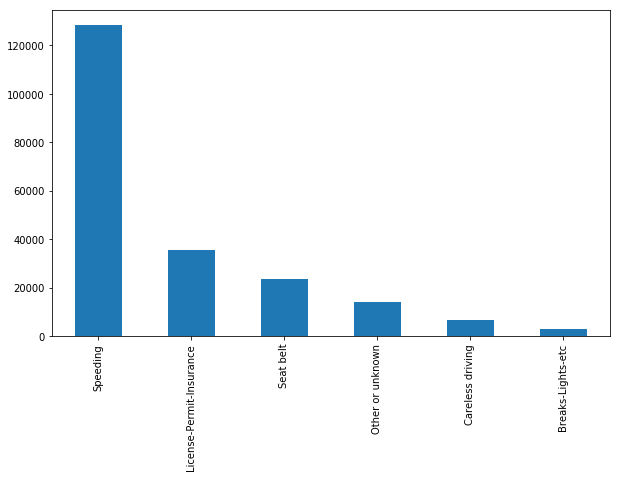

In [8]:
stops['violation'].value_counts().plot.bar()

We could also using the `rot` parameter to rotate the labels in our X axe.

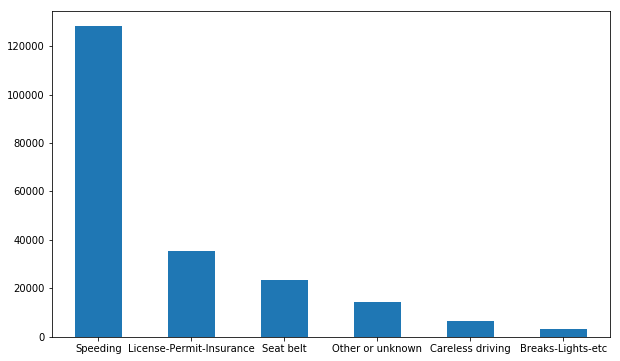

In [9]:
stops['violation'].value_counts().plot.bar(rot=0)

Bar charts are very flexible: The height can represent anything, as long as it is a number. And each bar can represent anything, as long as it is a category.

In this case the categories are **nominal** categories: "pure" categories that don't make a lot of sense to order. Nominal categorical variables include things like countries, ZIP codes, types of cheese, and lunar landers. The other kind are **ordinal** categories: things that do make sense to compare, like earthquake magnitudes, housing complexes with certain numbers of apartments, and the sizes of bags of chips at your local deli.

### Styling your plot

Let us now define a new columnd `wb_delta` as `pct_black_stopped` subtracted from `pct_white_stopped` to indicate bias for each of the MS counties, and then plot it by county name.

In [10]:
stops_county['wb_delta'] = stops_county['pct_white_stopped'] - stops_county['pct_black_stopped']

We can easily change the color of the bars.

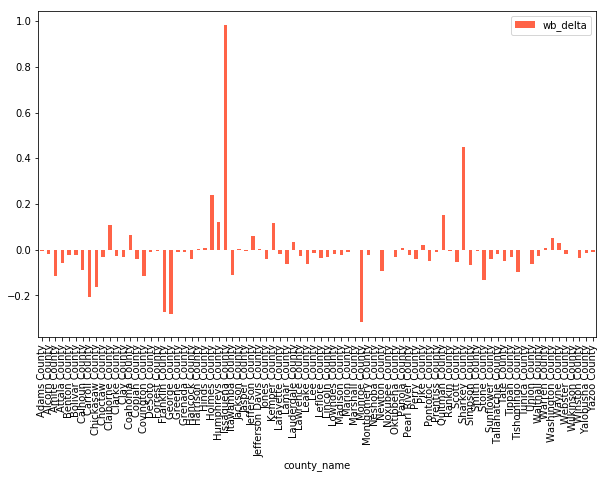

In [12]:
stops_county.plot.bar(x='county_name', y='wb_delta', color='tomato')

And even the opacity by using `alpha`.

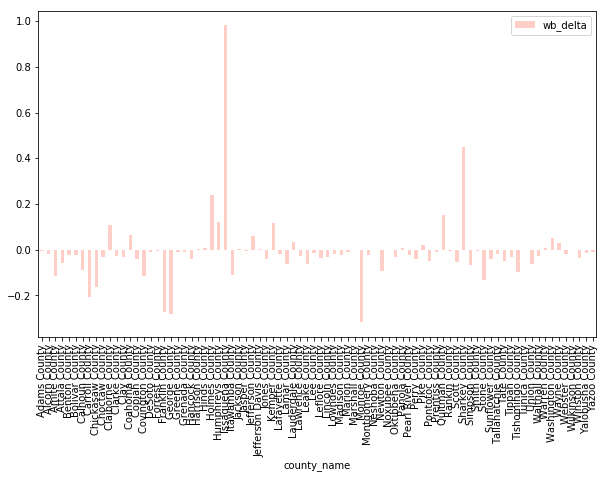

In [13]:
stops_county.plot.bar(x='county_name', y='wb_delta', alpha=0.3, color='tomato')

That's not very readable, and rotating the axe labels wouldn't help either. Let's use a horizontal bar chart instead, `barh()`, and also pass in `figsize`.

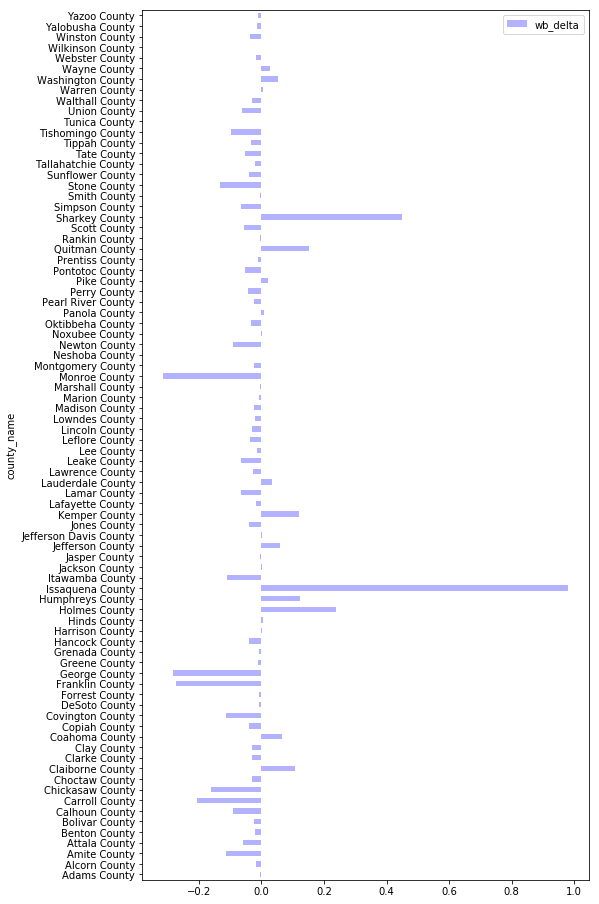

In [14]:
stops_county.plot.barh(x='county_name', y='wb_delta', alpha=0.3, color='blue', figsize=(8, 16))

We could order the counties (X axis) by the delta values plotted on the Y axis. From lowest (black bias) to highest value (white bias).

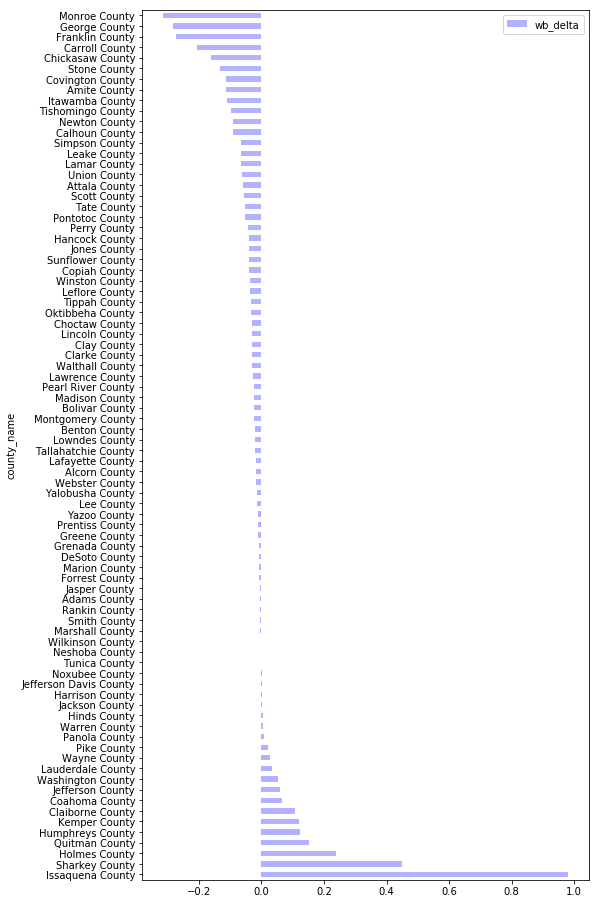

In [15]:
(stops_county
     .sort_values('wb_delta', ascending=False)
     .plot.barh(x='county_name', y='wb_delta', alpha=0.3, color='blue', figsize=(8, 16)))

Each time you call `plot()` an `Axes` object is returned, and Jupyter knows how to paint those. `Axes` objects are objects of the underlying `matplotlib` library for plotting in Python, and as such, lots of different options can be given to customize the aspect.

For example, we could set axes labels or a title. Let's also get rid of the legend.

Text(0.5,1,'White/Black difference')

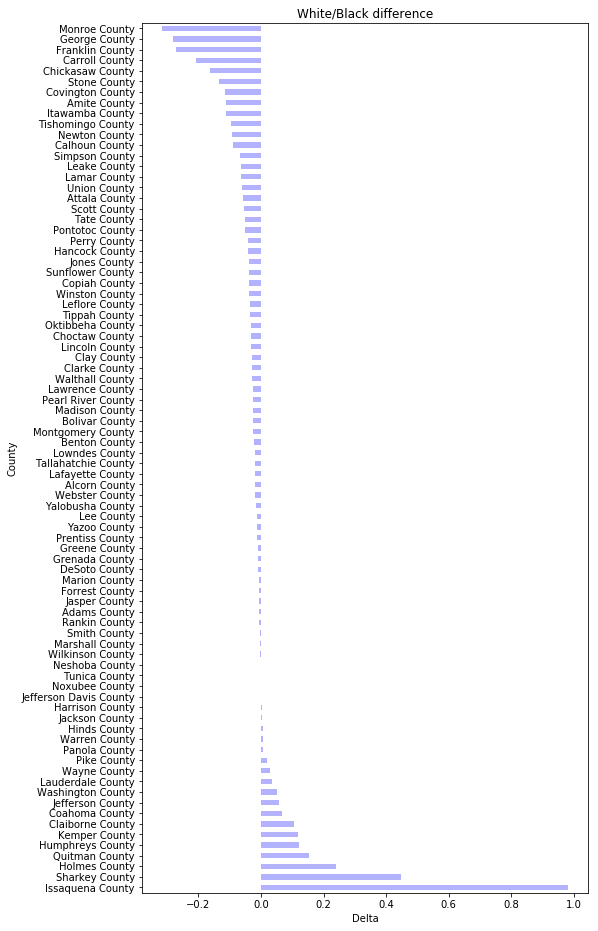

In [16]:
ax = (stops_county
     .sort_values('wb_delta', ascending=False)
     .plot.barh(x='county_name', y='wb_delta', alpha=0.3, color='blue', legend=False, figsize=(8, 16)))
ax.set_xlabel("Delta")
ax.set_ylabel("County")
ax.set_title("White/Black difference")

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Using `stops`, plot the total number of vilolations per week day in a horizontal bar chart. Adjust the labels to the resulting plot looks like the one below.
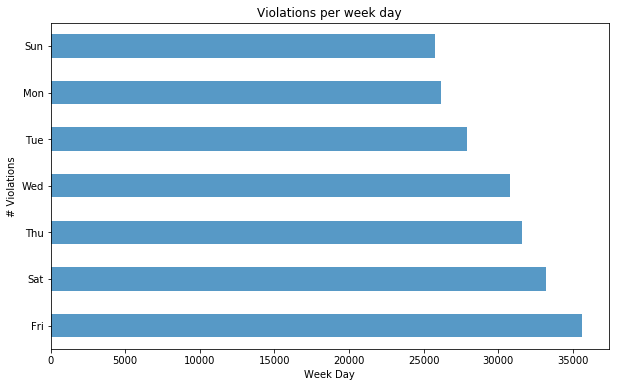
<br/>
* **Hint**: Try adjusting the opacity to 50%.*
</p>
</div>

In [ ]:
ax = stops['wk_day'].value_counts().plot.barh(alpha=0.5)
ax.set_xlabel("Week Day")
ax.set_ylabel("# Violations")
ax.set_title("Violations per week day")

### Histograms

A histogram looks, trivially, like a bar plot. And it basically is. In fact, a histogram is special kind of bar plot that splits your data into even intervals and displays how many entries are in each interval with bars. The only analytical difference is that instead of each bar representing a single value, it represents a range of values; this is call the bin.

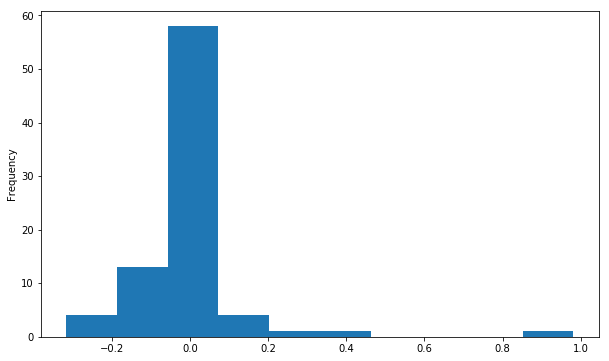

In [17]:
stops_county['wb_delta'].plot.hist()

The number of bins can also be setup beforehand.

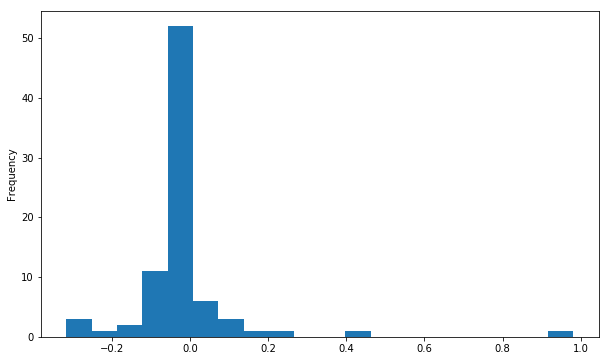

In [19]:
stops_county['wb_delta'].plot.hist(bins=20)

### Boxplots

Another way to visualize univariate distributions is the boxplot, which displays a lot of statistical useful information about it.

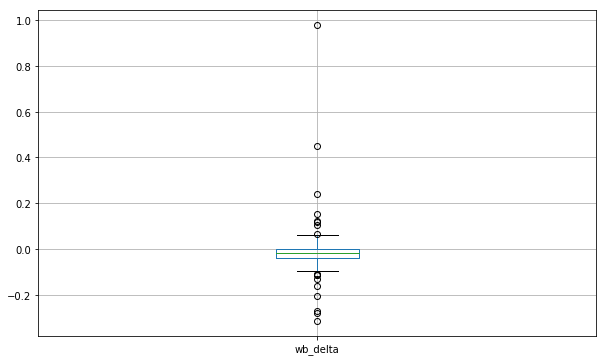

In [20]:
stops_county.boxplot('wb_delta')

And while this is not super useful in this case, it can make comparing data very poweful.

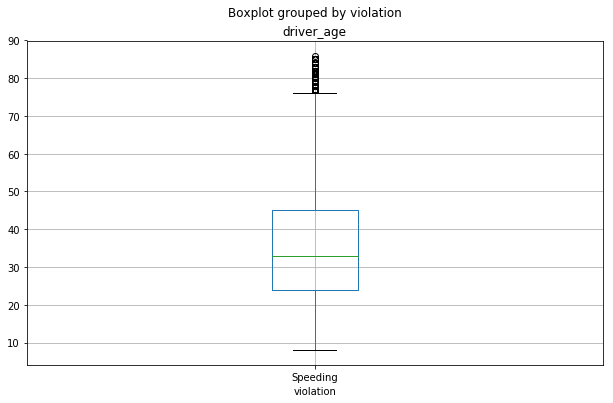

In [21]:
stops[stops['violation'] == 'Speeding'].boxplot('driver_age', by='violation')

### Line charts

A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Let's try plotting our `wb_delta` using a line chart.

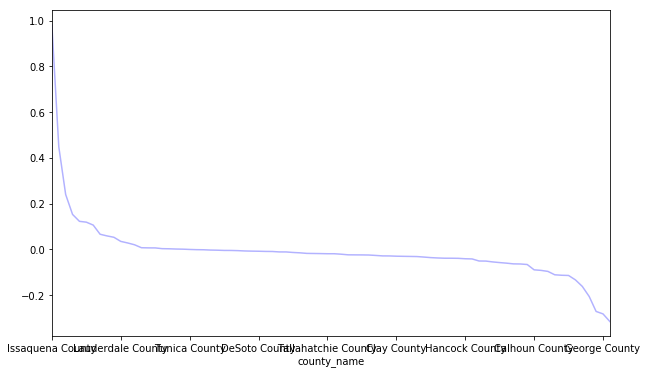

In [22]:
(stops_county
     .sort_values('wb_delta', ascending=False)
     .plot.line(x='county_name', y='wb_delta', alpha=0.3, color='blue', legend=False))

Line charts also make it harder to distinguish between individual values. In general, if your data can fit into a bar chart, just use a bar chart.

### Time series

There is, however, a type of chart at which line charts excel at: time series.

To demonstrate time series data we will count the number of violations for each day of the week. First we will create a new `DataFrame` `wd_violations`.

In [23]:
wd_violations = stops.groupby(['wk_day', 'violation'])[['state']].count().reset_index().rename(columns={'state': 'total'})
wd_violations

,wk_day,violation,total
0,Fri,Breaks-Lights-etc,564
1,Fri,Careless driving,1147
2,Fri,License-Permit-Insurance,6596
3,Fri,Other or unknown,2602
4,Fri,Seat belt,3946
...,...,...,...
37,Wed,Careless driving,933
38,Wed,License-Permit-Insurance,4628
39,Wed,Other or unknown,1863
40,Wed,Seat belt,3613


Let's plot it now using a line chart only for the speeding violations.

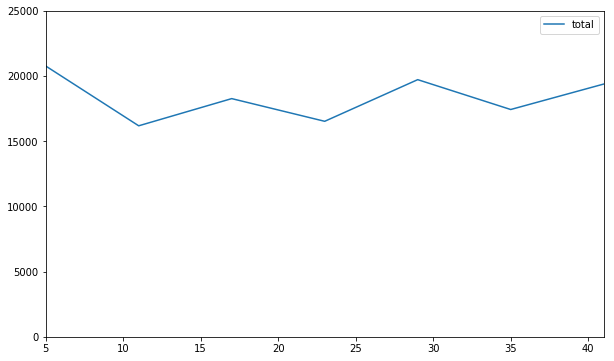

In [24]:
wd_violations[wd_violations['violation'] == 'Speeding'].plot.line(ylim=(0, 25000))

### Area charts

Area charts are just line charts, but with the bottom shaded in

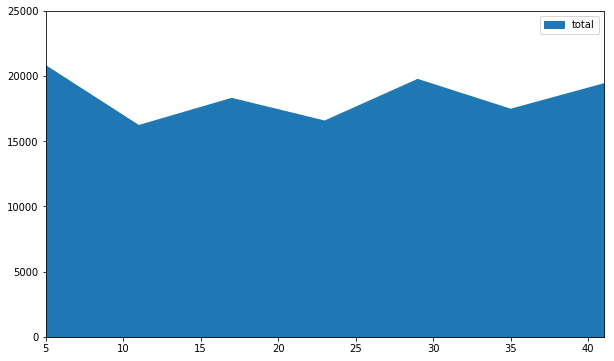

In [25]:
wd_violations[wd_violations['violation'] == 'Speeding'].plot.area(ylim=(0, 25000))

When plotting only one variable, the difference between an area chart and a line chart is mostly visual. In this context, they can be used interchangably.

In this case, it would be just more useful to display the several kind of violations all together, so camparisons can be made. To do just do, we need bivariate plotting.

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Using `stops`, plot a histogram that shows the distribution of drivers age.
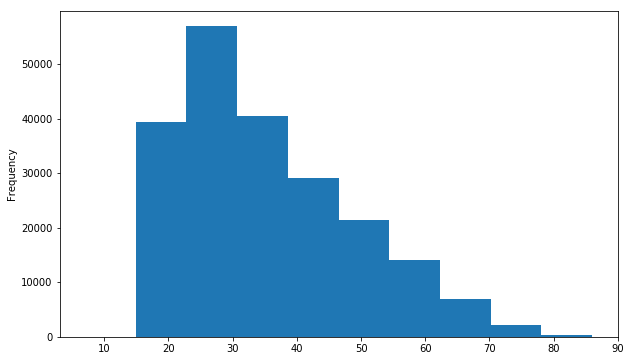
</p>
</div>

In [ ]:
stops['driver_age'].plot.hist()

## Bivariate plotting

<table>
<tbody><tr>
<td><img src="https://i.imgur.com/bBj1G1v.png" width="350px"></td>
<td><img src="https://i.imgur.com/ChK9zR3.png" width="350px"></td>
<td><img src="https://i.imgur.com/KBloVHe.png" width="350px"></td>
<td><img src="https://i.imgur.com/C7kEWq7.png" width="350px"></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Hex Plot</td>
<td style="font-weight:bold; font-size:16px;">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px;">Bivariate Line Chart</td>
</tr>
<tr>
<td>`df.plot.scatter()`</td>
<td>`df.plot.hex()`</td>
<td>`df.plot.bar(stacked=True)`</td>
<td>`df.plot.line()`</td>
</tr>
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
</tbody></table>
<div align="right">From Kaggle [Data Visualization](https://www.kaggle.com/learn/data-visualisation)</div>

In order to understand how variables interact with one another, we might use plots that enable these possibilities. Bivariate plotting can also be easily extendeed to more than 2 variables (in some cases).

### Scatter plots

For example, in order to see if there is any *bias* in our data from traffic stops, we can plot the two values, `pct_black_stopped` and `pct_white_stopped`, against each other and see if they line up at a 45 degree angle. A scatter plot is the simplest bivariate plot: it maps each variable of interest to a point in two-dimensional space. To draw a scatter plot you need to call `scatter()` on a `DataFrame`'s `plot` attribute, and then pass in the variables names representing the axes, `x` and `y`, in the `DataFrame` columns.

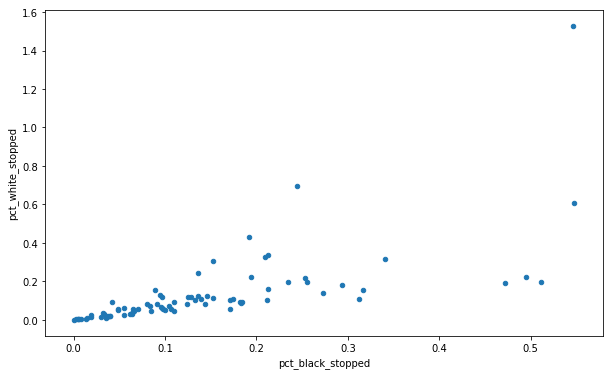

In [26]:
stops_county.plot.scatter(x='pct_black_stopped', y='pct_white_stopped')

And the same parameters for style can also be used here.

(0, 0.2)

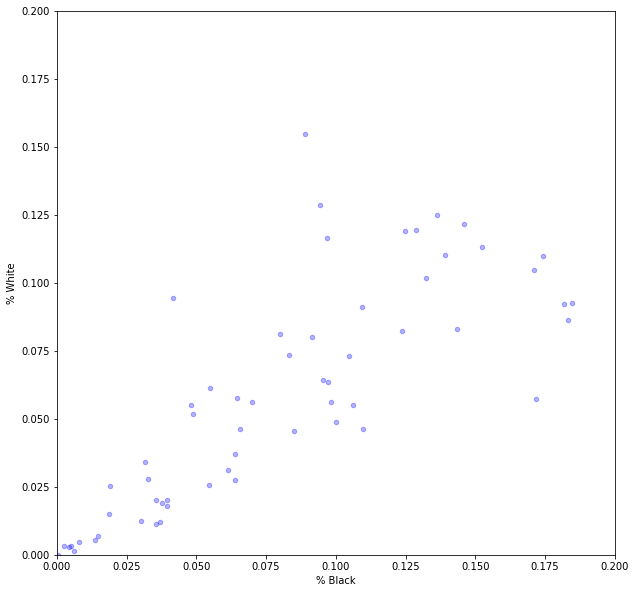

In [27]:
fig, ax = plt.subplots(1, figsize=(10, 10))
stops_county.plot.scatter(ax=ax, x='pct_black_stopped', y='pct_white_stopped', alpha=0.3, color='blue')
ax.set_ylabel("% White")
ax.set_xlabel("% Black")
ax.set_xlim([0, .2])
ax.set_ylim([0, .2])

### Hexplots

When a scatter plot has too many overlapping points, it might be difficult to interpret or see what's happening. For cases like those, we can use a hexplot, which aggregates points in space into hexagons, and then colorize those hexagons.

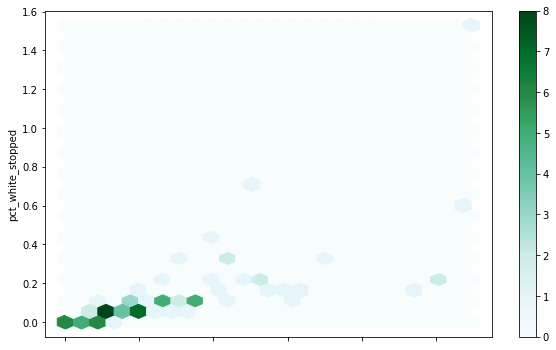

In [28]:
stops_county.plot.hexbin(x='pct_black_stopped', y='pct_white_stopped', gridsize=25)

A hexplot resembles what a histogram does, but for bivariate distributions.

Hexplots and scatter plots can by applied to combinations of interval variables or ordinal categorical variables. To help aleviate overplotting, scatter plots (and, to a lesser extent, hexplots) benefit from variables which can take on a wide range of unique values.

### Stacked plots

We could also split our `stops` `DataFrame` by gender, although to do so, we need a pivot table first and aggregate (counting in this case) values by any column other than `violation` and `driver_gender`, for example `state`. Doable, but not really that intuitive.

In [29]:
stops.pivot_table(index='violation', columns='driver_gender', values='state', aggfunc=len)

driver_gender,female,male
violation,,
Breaks-Lights-etc,859,2241
Careless driving,2222,4434
License-Permit-Insurance,13636,21862
Other or unknown,5026,9169
Seat belt,7733,15678
Speeding,58941,69269


With that new pivot table, are now able to use `bar()` as usual.

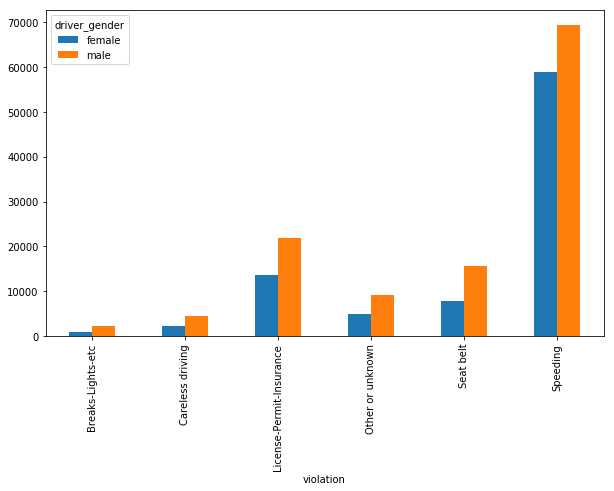

In [30]:
stops.pivot_table(index='violation', columns='driver_gender', values='state', aggfunc=len).plot.bar()

Or stack it together per value of `violation`, and also changin the colors.

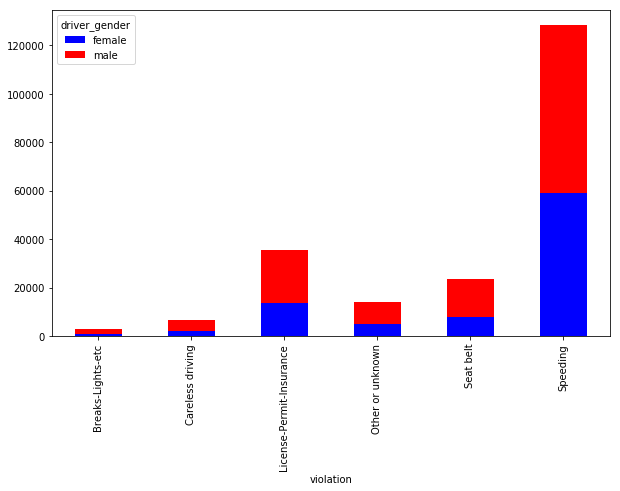

In [31]:
(stops
    .pivot_table(index='violation', columns='driver_gender', values='state', aggfunc=len)
    .plot.bar(stacked=True, color=['blue', 'red']))

But if we wanted to have a 100% stacked graph, things get a bit messy with the simple Pandas plotting capabilities.

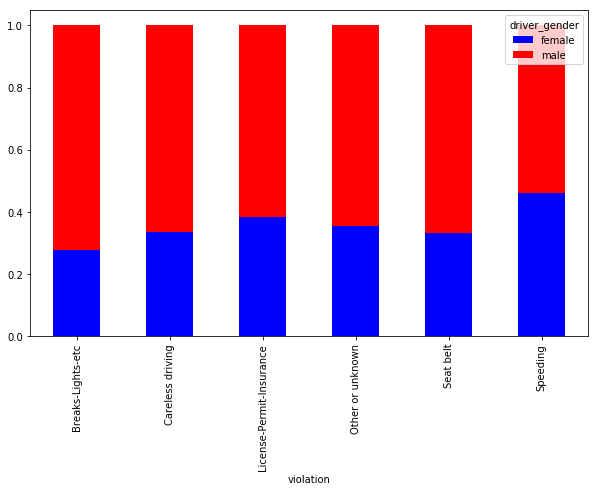

In [32]:
pivot_table = stops.pivot_table(index='violation', columns='driver_gender', values='state', aggfunc=len)
pivot_table.div(pivot_table.sum(1), axis=0).plot.bar(stacked=True, color=['blue', 'red'])

The same things apply for area and line charts.

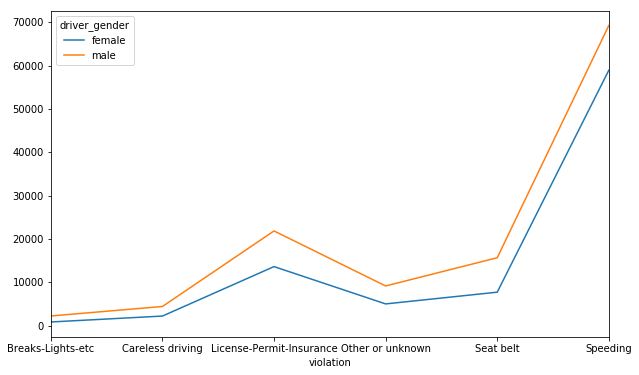

In [33]:
stops.pivot_table(index='violation', columns='driver_gender', values='state', aggfunc=len).plot.line()

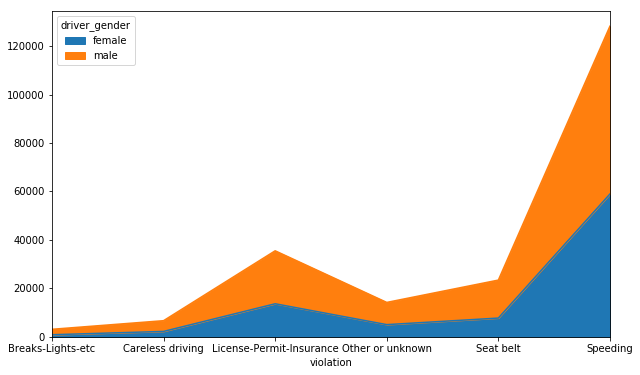

In [34]:
stops.pivot_table(index='violation', columns='driver_gender', values='state', aggfunc=len).plot.area()

### Boxplots (again)

Boxplots are also naturally good at representing more than 1 distribution

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


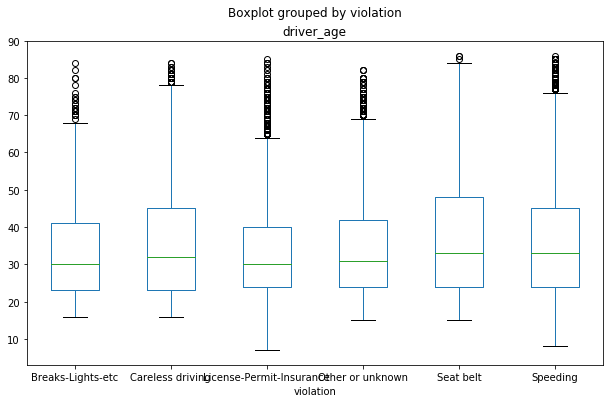

In [35]:
stops.boxplot('driver_age', by='violation', grid=False)

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Using `stops_county`, plot a scatter plot for `pct_white_stopped` anad `pct_black_stopped` that uses a different color for points, shows a range of data between 0.1 and 0.3, and has 100 as the size of the points.
Output image should look something like this:
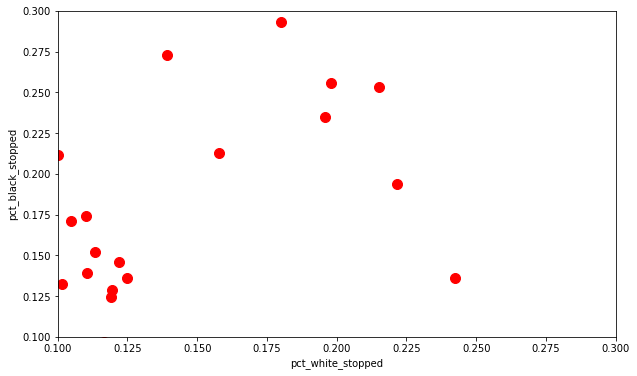
<br/>
* **Hint**: Take a look at the [documentaton for `scatter()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.plot.scatter.html).*
</p>
</div>

In [ ]:
ax = stops_county.plot.scatter(x='pct_white_stopped', y='pct_black_stopped', s=100, color='red')
ax.set_xlim([.1, .3])
ax.set_ylim([.1, .3])

## Styling

matplotlib uses styles to guide the default visual aspects of a plot, and while those can always be changed individually, a style can be set for an entire Python session or set of plots. Beyond the default `classic` style, there are other styles available as well.

In [36]:
plt.style.available

['fast',
 'fivethirtyeight',
 'dark_background',
 'seaborn-notebook',
 'seaborn-paper',
 'grayscale',
 'seaborn-ticks',
 'ggplot',
 'seaborn-deep',
 'classic',
 'seaborn-colorblind',
 '_classic_test',
 'bmh',
 'Solarize_Light2',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-talk',
 'seaborn-muted',
 'seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-white',
 'seaborn']

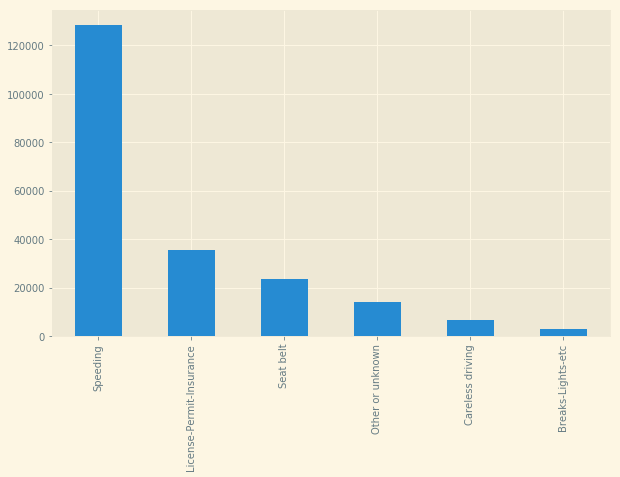

In [38]:
with plt.style.context('Solarize_Light2'):
    stops['violation'].value_counts().plot.bar()

Even a special one for XKCD!

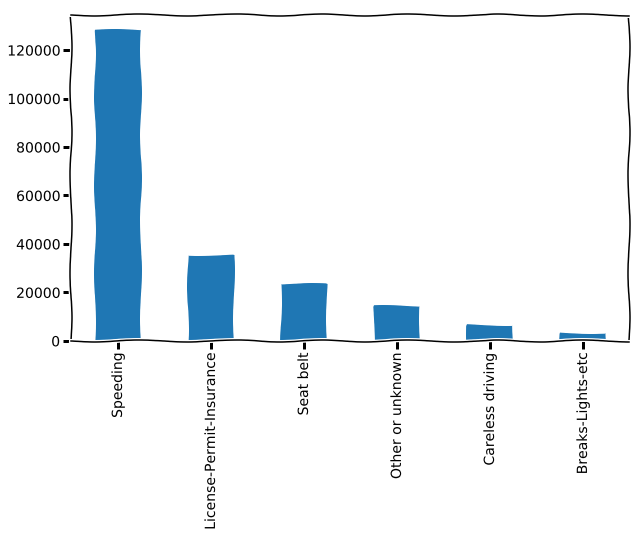

## Seaborn

`seaborn`, a convenience wrapper around `matplotlib`, changes the default style after being imported, but it can be reverted back easily setting the default style to `classic` using `plt.style.use("classic")`.

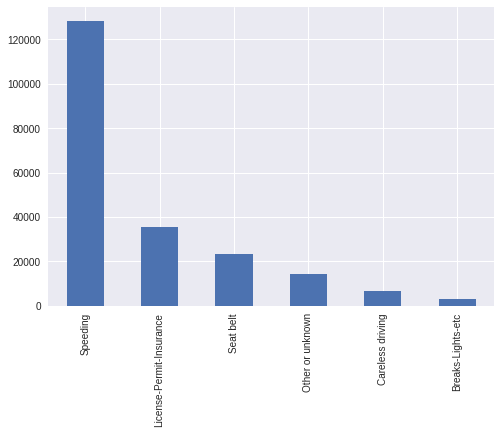

In [40]:
import seaborn as sns
plt.style.use("seaborn")
stops['violation'].value_counts().plot.bar()

Seaborn is designed to work with *record-oriented* or *tidy* data out-of-the-box, for all of its plot types, with minimal fuss. This makes it an incredibly convenient workbench tool.

Pandas is not designed this way. In Pandas, every plot we generate is tied very directly to the input data. In essence, Pandas expects your data being in exactly the right output shape, regardless of what the input is.

Hence, in practice, despite its simplicity, the Pandas plotting tools are great for the initial stages of exploratory data analytics, but seaborn really becomes your tool of choice once you start doing more sophisticated explorations.

For example, to fit and show a regression line in a scatter plot, we just need to pass in `fit_reg` to seaborn's `lmplot()` or `regplot()`.

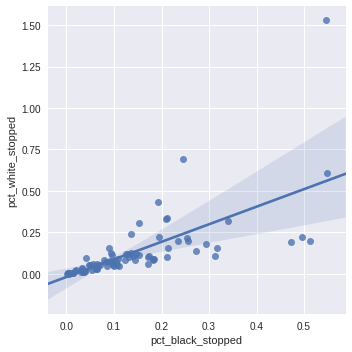

In [41]:
sns.lmplot(data=stops_county, x='pct_black_stopped', y='pct_white_stopped', fit_reg=True) 

It can also group and split very easily too.

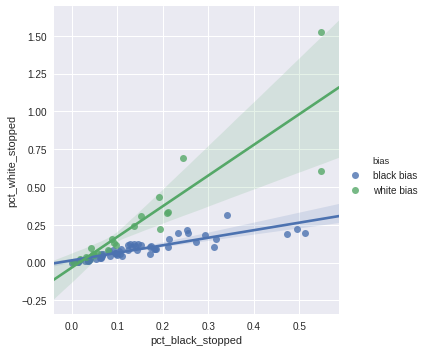

In [42]:
sns.lmplot(data=stops_county, x='pct_black_stopped', y='pct_white_stopped', hue='bias', fit_reg=True) 

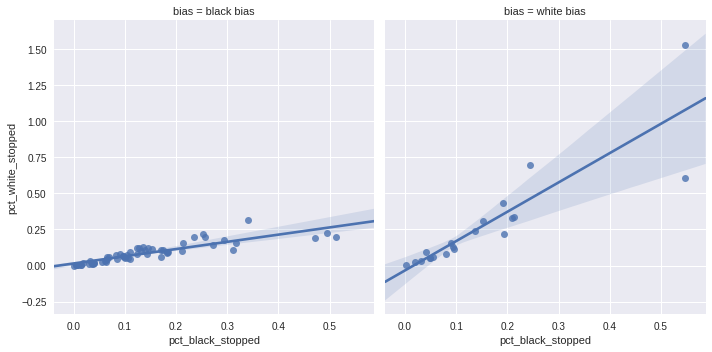

In [43]:
sns.lmplot(data=stops_county, x='pct_black_stopped', y='pct_white_stopped', col='bias', fit_reg=True) 

Plotting a hexplot with accompanying histograms gets simple.

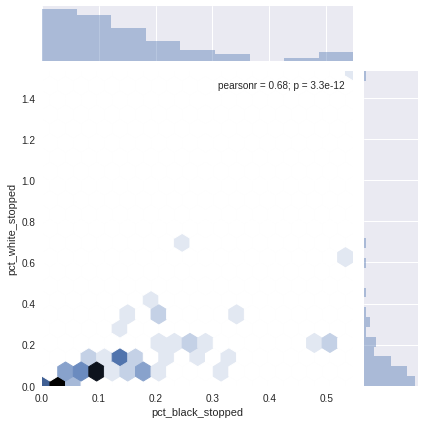

In [44]:
sns.jointplot(data=stops_county, x='pct_black_stopped', y='pct_white_stopped', kind='hex', 
              gridsize=20)

Or creating a more visually enticing verson of the boxplot, the violin plot.

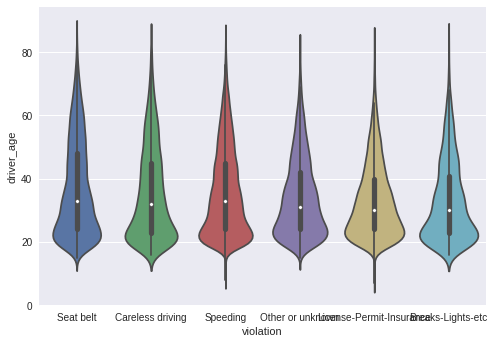

In [45]:
sns.violinplot(x='violation', y='driver_age', data=stops)

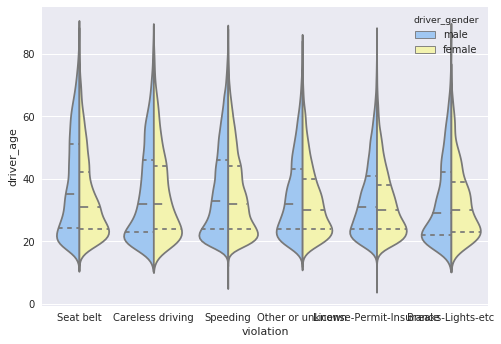

In [46]:
sns.set(palette="pastel", color_codes=True)
sns.violinplot(x='violation', y='driver_age', hue="driver_gender", split=True,
               inner="quart", palette={"male": "b", "female": "y"}, data=stops)

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
`stripplot()` and `swarmplot()` are types of categorical scatterplots that generalize a scatterplot to the case where one of the variables is categorical. The main different between them is that one avoids overlapping points while the other doesn't. `stripplot()` also allows to add some random `jitter` to get a nicer visualization.

Using `stops`, plot a `stripplot()` with jitter and a `swarmplot()` showing the distribution of drivers age by violation and driver gender, and only for the Chickasaw county.

Output images should look something like this:
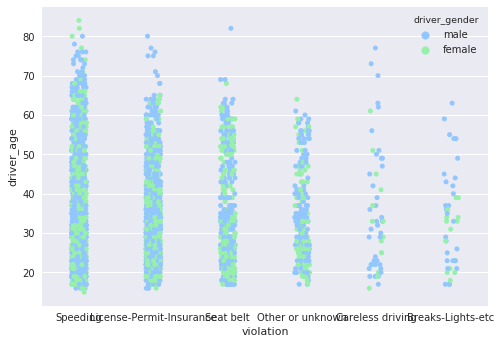
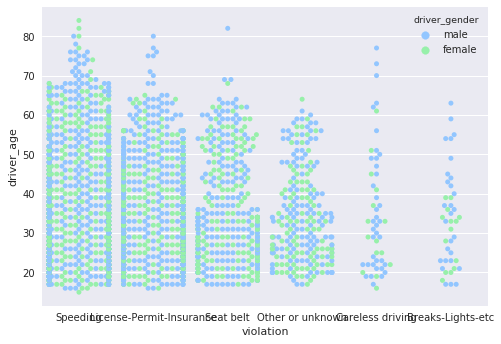
<br/>
* **Hint**: Now it's a good time to take a look at the seaborn [documentation](https://seaborn.pydata.org/index.html).*
</p>
</div>

In [ ]:
chickasaw = stops[stops['county_name'] == 'Chickasaw County']

In [ ]:
sns.stripplot(x="violation", y="driver_age", hue="driver_gender", jitter=True, data=chickasaw)

In [ ]:
sns.swarmplot(x="violation", y="driver_age", hue="driver_gender", data=chickasaw)

### Faceting

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.



In [ ]:
g = sns.FacetGrid(wd_violations, col='wk_day')
g.map(sns.distplot, 'total')

In [ ]:
g = sns.FacetGrid(wd_violations, col='violation')
g.map(sns.distplot, 'total')

In [ ]:
wd_viol_race = stops.groupby(['wk_day', 'violation', 'driver_race'])[['state']].count().reset_index().rename(columns={'state': 'total'})
wd_viol_race

In [ ]:
g = sns.FacetGrid(wd_viol_race, col='wk_day', hue='driver_race', col_wrap=3)
g.map(plt.scatter, 'total', 'violation')

## Interactive plots with Plotly

Both Pandas and seaborn focus on building "static" visualizations: visualizations that have no moving parts. In other words, all of the plots we've built thus far could appear in a paper journal article.

The web unlocks a lot of possibilities when it comes to interactivity and animations. There are a number of plotting libraries available which try to provide these features.

Plotly, an open-source plotting library, is one of this options.

In [47]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace = go.Scatter(x=stops_county.pct_black_stopped, y=stops_county.pct_white_stopped, mode='markers')
iplot([trace])

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Go to the [documentation of Plotly](https://plot.ly/python) and try to replicate our previous multivariate boxplot: `stops.boxplot('driver_age', by='violation', grid=False)`

It should look something like this:
<img src="plotly.png">
</p>
</div>

In [ ]:
traces = []
for violation in stops.violation.unique():
    traces.append(go.Box(
        y=stops[stops['violation'] == violation]['driver_age'],
        name = violation,
    ))
iplot(traces)

## Evaluation survey
Please, spend 1 minute answering these questions that can help us a lot on future workshops. 